# Homework 1
## Israel Sánchez Miranda A0
## Erick Hernández Silva A01750170

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def compute_error(obtained_value, true_value):
    """
    Function to compute the two-norm error

    Parameters:
    obtained_value (numpy.ndarray): The obtained value.
    true_value (numpy.ndarray): The true value.

    Returns:
    float: The error between the obtained value and the true value.
    """
    return np.linalg.norm(obtained_value - true_value)

# Hill Climber method for single objective minimization problems.

In [3]:
# Hill Climber Method with path tracking and iteration counting
def hill_climber(f, x0, step_size=0.01, max_iter=1000):
    """
    Hill Climber algorithm for optimization.
    Parameters:
    - f: function
        The objective function to be optimized.
    - x0: array-like
        The initial point for the optimization.
    - step_size: float, optional
        The step size for generating random perturbations. Default is 0.01.
    - max_iter: int, optional
        The maximum number of iterations. Default is 1000.
    Returns:
    - x: array-like
        The optimized point.
    - best_val: float
        The value of the objective function at the optimized point.
    - path: array-like
        The path of points explored during the optimization.
    - func_evals: int
        The number of function evaluations performed during the optimization.
    """
    x = np.array(x0)
    best_val = f(*x)
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    
    for i in tqdm(range(max_iter), desc="Hill Climber Progress"):
        # Generate a random perturbation
        perturbation = np.random.uniform(-step_size, step_size, size=x.shape)
        new_x = x + perturbation
        new_val = f(*new_x)
        func_evals += 1
        
        # If the new point is better, move to it
        if new_val < best_val:
            x = new_x
            best_val = new_val
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress every 100 iterations
        if i % 100 == 0 or i == max_iter - 1:
            print(f"Iteration {i}: Best Value = {best_val}, Current Point = {x}")
    
    return x, best_val, np.array(path), func_evals

# Gradient descent method with Wolfe conditions for step size control

In [4]:
# Gradient Descent with Wolfe Conditions, path tracking and iteration counting
def gradient_descent_wolfe(f, grad_f, x0, t=1.0, c1=1e-4, c2=0.9, max_iter=20):
    x = np.array(x0)
    max_wolfe_iter = max_iter
    initial_t = t
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    grad_evals = 1  # Initial gradient evaluation
    
    def wolfe_conditions(t, grad, direction):
        return (f(*(x + t * direction)) <= f(*x) + c1 * t * np.dot(grad, direction)) and \
               (np.dot(grad_f(*(x + t * direction)), direction) >= c2 * np.dot(grad, direction))
    
    for i in tqdm(range(max_iter), desc="Gradient Descent Progress"):
        grad = grad_f(*x)
        grad_evals += 1
        direction = -grad
        wolfe_iter = 0
        t = initial_t
        
        # Step size control using Wolfe conditions
        while not wolfe_conditions(t, grad, direction) and wolfe_iter < max_wolfe_iter:
            if f(*(x + t * direction)) > f(*x) + c1 * t * np.dot(grad, direction):
                t *= 0.5
            elif np.dot(grad_f(*(x + t * direction)), direction) < c2 * np.dot(grad, direction):
                t *= 2.0
            else:
                break
            wolfe_iter += 1
            func_evals += 1
        
        x = x + t * direction
        func_evals += 1
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress
        if i % 10 == 0 or i == max_iter - 1:
            print(f"Iteration {i}: Current Value = {f(*x)}, Current Point = {x}")
        
        # Check for stopping criterion
        if np.linalg.norm(grad) < 1e-8:
            break
    
    return x, f(*x), np.array(path), func_evals, grad_evals

# Newton method for optimization

In [5]:
# Newton's Method with path tracking, iteration counting, and stopping criterion
def newton_method(f, grad_f, hess_f, x0, min_iter=20, max_iter=100):
    """
    Newton's method for finding the minimum of a function.
    Parameters:
    - f (function): The objective function to minimize.
    - grad_f (function): The gradient of the objective function.
    - hess_f (function): The Hessian matrix of the objective function.
    - x0 (array-like): The initial point for the optimization.
    - min_iter (int): The minimum number of iterations to perform. Defaults to 20.
    - max_iter (int): The maximum number of iterations to perform. Defaults to 100.
    Returns:
    - x (array-like): The optimized point.
    - f(x) (float): The value of the objective function at the optimized point.
    - path (array-like): The path of points visited during the optimization.
    - func_evals (int): The number of function evaluations performed.
    - grad_evals (int): The number of gradient evaluations performed.
    - hess_evals (int): The number of Hessian evaluations performed.
    """
    x = np.array(x0)
    
    path = [x.copy()]  # Store the initial point
    func_evals = 1  # Initial function evaluation
    grad_evals = 1  # Initial gradient evaluation
    hess_evals = 1  # Initial Hessian evaluation
    
    for i in tqdm(range(max_iter), desc="Newton Method Progress"):
        grad = grad_f(*x)
        hess = hess_f(*x)
        grad_evals += 1
        hess_evals += 1
        
        # Solve for the search direction
        direction = np.linalg.solve(hess, -grad)
        
        x = x + direction
        func_evals += 1
        
        # Clip the values to avoid overflow
        x = np.clip(x, -1e2, 1e2)
        
        # Store the current point in the path
        path.append(x.copy())
        
        # Print the progress
        
        print(f"Iteration {i}: Current Value = {f(*x)}, Current Point = {x}")
        
        # Check for stopping criterion after minimum iterations
        if i >= min_iter and np.linalg.norm(grad) < 1e-4:
            print('STOPPING CRITERION REACHED')
            break
    
    return x, f(*x), np.array(path), func_evals, grad_evals, hess_evals


# Testing

## Define functions for testing

In [6]:
# Define the functions
def func1(x1, x2):
    """
    Calculate the value of the function -2*x1**2 + 3*x1*x2 - 1.5*x2**2 - 1.3.

    Parameters:
    x1 (float): The value of the first variable.
    x2 (float): The value of the second variable.

    Returns:
    float: The calculated value of the function.
    """
    return -2*x1**2 + 3*x1*x2 - 1.5*x2**2 - 1.3

def func2(x1, x2):
    """
    Calculate the value of the given function for the given inputs.

    Parameters:
    x1 (float): The first input value.
    x2 (float): The second input value.

    Returns:
    float: The calculated value of the function.
    """
    return np.clip((4 - 2.1*x1**2 + x1**4 / 3) * x1**2 + x1*x2 + (-4 + 4*x2**2) * x2**2, -1e10, 1e10)

def rastrigin_2d(x1, x2, A=10):
    """
    Calculates the value of the Rastrigin function in 2D.

    Parameters:
    - x1 (float): The x-coordinate of the point.
    - x2 (float): The y-coordinate of the point.
    - A (float, optional): The amplitude of the function. Default is 10.

    Returns:
    float: The value of the Rastrigin function at the given point.
    """
    return A * 2 + (x1**2 - A * np.cos(2 * np.pi * x1)) + (x2**2 - A * np.cos(2 * np.pi * x2))


## Define functions, gradients, and starting points

In [7]:
# Define the gradients
def grad_func1(x1, x2):
    """
    Calculate the gradient of a function with respect to x1 and x2.

    Parameters:
    x1 (float): The value of x1.
    x2 (float): The value of x2.

    Returns:
    numpy.ndarray: The gradient of the function as a numpy array.
    """
    df_dx1 = -4*x1 + 3*x2
    df_dx2 = 3*x1 - 3*x2
    return np.array([df_dx1, df_dx2])

def grad_func2(x1, x2):
    """
    Calculate the gradient of a function with respect to x1 and x2.

    Parameters:
    - x1 (float): The value of x1.
    - x2 (float): The value of x2.

    Returns:
    - numpy.ndarray: An array containing the partial derivatives of the function with respect to x1 and x2.
    """
    df_dx1 = (8*x1 - 4.2*x1**3 + 4*x1**3) + x2
    df_dx2 = x1 + (8*x2**3 - 8*x2)
    return np.array([df_dx1, df_dx2])

def grad_rastrigin_2d(x1, x2, A=10):
    """
    Calculate the gradient of the Rastrigin function in 2D.

    Parameters:
    - x1 (float): The x-coordinate of the point.
    - x2 (float): The y-coordinate of the point.
    - A (float, optional): The amplitude parameter. Default is 10.

    Returns:
    - numpy.ndarray: The gradient vector of the Rastrigin function at the given point.
    """
    grad_x1 = 2*x1 + 2 * np.pi * A * np.sin(2 * np.pi * x1)
    grad_x2 = 2*x2 + 2 * np.pi * A * np.sin(2 * np.pi * x2)
    return np.array([grad_x1, grad_x2])

# Define the Hessians
def hess_func1(x1, x2):
    """
    Calculate the Hessian matrix for a given function.

    Parameters:
    x1 (float): The value of the first variable.
    x2 (float): The value of the second variable.

    Returns:
    numpy.ndarray: The Hessian matrix of the function.
    """
    d2f_dx1x1 = -4
    d2f_dx1x2 = 3
    d2f_dx2x1 = 3
    d2f_dx2x2 = -3
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

def hess_func2(x1, x2):
    """
    Calculate the Hessian matrix of a function.

    Parameters:
    x1 (float): The value of the first variable.
    x2 (float): The value of the second variable.

    Returns:
    numpy.ndarray: The Hessian matrix of the function.
    """
    d2f_dx1x1 = 8 - 12.6*x1**2 + 12*x1**2
    d2f_dx1x2 = 1
    d2f_dx2x1 = 1
    d2f_dx2x2 = 24*x2**2 - 8
    return np.array([[d2f_dx1x1, d2f_dx1x2], [d2f_dx2x1, d2f_dx2x2]])

def hess_rastrigin_2d(x1, x2, A=10):
    """
    Calculates the Hessian matrix for the Rastrigin function in 2D.

    Parameters:
    - x1 (float): The value of the first variable.
    - x2 (float): The value of the second variable.
    - A (float, optional): The amplitude parameter. Defaults to 10.

    Returns:
    - numpy.ndarray: The Hessian matrix of the Rastrigin function at the given point (x1, x2).
    """
    hess_x1x1 = 2 + 4 * np.pi**2 * A * np.cos(2 * np.pi * x1)
    hess_x2x2 = 2 + 4 * np.pi**2 * A * np.cos(2 * np.pi * x2)
    hess_x1x2 = 0
    hess_x2x1 = 0
    return np.array([[hess_x1x1, hess_x1x2], [hess_x2x1, hess_x2x2]])

# Starting points
x0_func1 = [-4, 4]
x0_func2 = [0.5, 1]
x0_rastrigin = [-2, 2]

# True optimal values (if known)
true_min_func1 = np.array([0, 0])
true_min_func2 = np.array([0, 0])  # Assumed, depending on the function specifics
true_min_rastrigin = np.array([0, 0])

# Results

## Executing code

Testing Hill Climber Method:


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 111128.00it/s]


Iteration 0: Best Value = -105.3, Current Point = [-4.  4.]
Iteration 100: Best Value = -115.60570725775305, Current Point = [-4.2369446  4.1427872]
Iteration 200: Best Value = -126.59953089330489, Current Point = [-4.43248779  4.34156702]
Iteration 300: Best Value = -134.34700028058188, Current Point = [-4.62715841  4.40396196]
Iteration 400: Best Value = -142.76569919189294, Current Point = [-4.79620407  4.51199706]
Iteration 500: Best Value = -151.7655423070122, Current Point = [-5.0042771   4.58544475]
Iteration 600: Best Value = -162.37561918390548, Current Point = [-5.18016715  4.74147765]
Iteration 700: Best Value = -173.11312393338562, Current Point = [-5.34752332  4.89991933]
Iteration 800: Best Value = -187.32168001830118, Current Point = [-5.57457647  5.08637185]
Iteration 900: Best Value = -196.40470654978466, Current Point = [-5.73194987  5.18217193]
Iteration 999: Best Value = -211.5307531003256, Current Point = [-6.0008093  5.3195528]


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 99997.71it/s]


Iteration 0: Best Value = 1.3537726374773236, Current Point = [0.49286078 1.00098677]
Iteration 100: Best Value = -0.06997485998328123, Current Point = [0.37712946 0.80987309]
Iteration 200: Best Value = -0.7102486933709077, Current Point = [0.18855207 0.74206403]
Iteration 300: Best Value = -1.0191970207329082, Current Point = [-0.03384727  0.70431222]
Iteration 400: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 500: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 600: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 700: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 800: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 900: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]
Iteration 999: Best Value = -1.031628382129044, Current Point = [-0.08983909  0.71256289]


Hill Climber Progress: 100%|██████████| 1000/1000 [00:00<00:00, 142857.77it/s]


Iteration 0: Best Value = 8.0, Current Point = [-2.  2.]
Iteration 100: Best Value = 7.960336710381311, Current Point = [-1.98899633  1.98830987]
Iteration 200: Best Value = 7.959848505973116, Current Point = [-1.98902976  1.98951051]
Iteration 300: Best Value = 7.959786871124798, Current Point = [-1.99070416  1.9899515 ]
Iteration 400: Best Value = 7.959724154043417, Current Point = [-1.98935665  1.98997007]
Iteration 500: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Iteration 600: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Iteration 700: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Iteration 800: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Iteration 900: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Iteration 999: Best Value = 7.959666002602177, Current Point = [-1.9899522   1.98978303]
Testing Gradient Descent with Wolfe Conditions:


Gradient Descent Progress: 100%|██████████| 20/20 [00:00<00:00, 2000.05it/s]


Iteration 0: Current Value = -65001.3, Current Point = [-100.  100.]
Iteration 10: Current Value = -65001.3, Current Point = [-100.  100.]
Iteration 19: Current Value = -65001.3, Current Point = [-100.  100.]


Gradient Descent Progress: 100%|██████████| 20/20 [00:00<00:00, 2222.68it/s]


Iteration 0: Current Value = 1.1035124149589484, Current Point = [-1.9875  0.75  ]
Iteration 10: Current Value = 0.060061190513864826, Current Point = [-1.56303775  0.89416635]
Iteration 19: Current Value = 0.06029955518089081, Current Point = [-1.56294466  0.89419207]


Gradient Descent Progress:   5%|▌         | 1/20 [00:00<00:00, 1000.07it/s]


Iteration 0: Current Value = 0.0, Current Point = [-1.53210777e-14  1.53210777e-14]
Testing Newton's Method:


Newton Method Progress:  20%|██        | 20/100 [00:00<00:00, 1538.52it/s]


Iteration 0: Current Value = -1.3, Current Point = [0. 0.]
Iteration 1: Current Value = -1.3, Current Point = [0. 0.]
Iteration 2: Current Value = -1.3, Current Point = [0. 0.]
Iteration 3: Current Value = -1.3, Current Point = [0. 0.]
Iteration 4: Current Value = -1.3, Current Point = [0. 0.]
Iteration 5: Current Value = -1.3, Current Point = [0. 0.]
Iteration 6: Current Value = -1.3, Current Point = [0. 0.]
Iteration 7: Current Value = -1.3, Current Point = [0. 0.]
Iteration 8: Current Value = -1.3, Current Point = [0. 0.]
Iteration 9: Current Value = -1.3, Current Point = [0. 0.]
Iteration 10: Current Value = -1.3, Current Point = [0. 0.]
Iteration 11: Current Value = -1.3, Current Point = [0. 0.]
Iteration 12: Current Value = -1.3, Current Point = [0. 0.]
Iteration 13: Current Value = -1.3, Current Point = [0. 0.]
Iteration 14: Current Value = -1.3, Current Point = [0. 0.]
Iteration 15: Current Value = -1.3, Current Point = [0. 0.]
Iteration 16: Current Value = -1.3, Current Point 

Newton Method Progress:  20%|██        | 20/100 [00:00<00:00, 9999.53it/s]


Iteration 0: Current Value = 0.0049039740624900185, Current Point = [-0.13483146  1.00842697]
Iteration 1: Current Value = -0.0004984952218581584, Current Point = [-0.1260225   1.00778586]
Iteration 2: Current Value = -0.0005031307994367712, Current Point = [-0.1260232  1.0077853]
Iteration 3: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 4: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 5: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 6: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 7: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 8: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 9: Current Value = -0.000503130803321053, Current Point = [-0.1260232  1.0077853]
Iteration 10: Current Value = -0.000503130803321053, Current Point = [-0.1

Newton Method Progress:  20%|██        | 20/100 [00:00<00:00, 9999.53it/s]

Iteration 0: Current Value = 7.959662398985785, Current Point = [-1.98991895  1.98991895]
Iteration 1: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 2: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 3: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 4: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 5: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 6: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 7: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 8: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 9: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration 10: Current Value = 7.959662381108174, Current Point = [-1.98991223  1.98991223]
Iteration

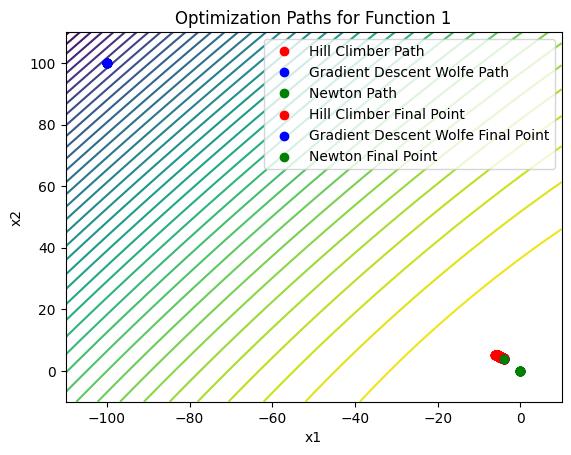

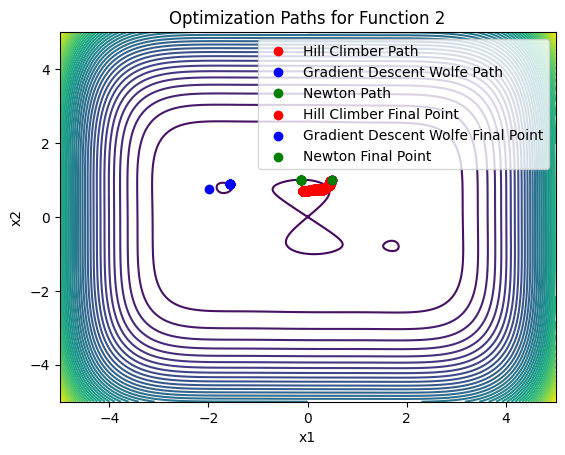

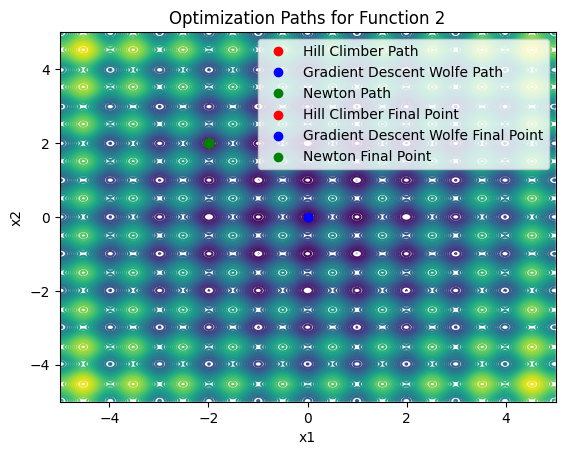

     Function                  Method  Iterations  Function Evals  \
0  Function 1            Hill Climber           1            1001   
1  Function 2            Hill Climber           1            1001   
2   Rastrigin            Hill Climber           1            1001   
3  Function 1                  Newton           1              22   
4  Function 2                  Newton           1              22   
5   Rastrigin                  Newton           1              22   
6  Function 1  Gradient Descent Wolfe           1             421   
7  Function 2  Gradient Descent Wolfe           1             387   
8   Rastrigin  Gradient Descent Wolfe           1              24   

   Gradient Evals  Hessian Evals  Final Error (2-norm)  
0               0              0          8.019187e+00  
1               0              0          7.182040e-01  
2               0              0          2.814098e+00  
3              22             22          0.000000e+00  
4              22       

In [8]:


# Initialize results dictionary
results = {
    'Function': [],
    'Method': [],
    'Iterations': [],
    'Function Evals': [],
    'Gradient Evals': [],
    'Hessian Evals': [],
    'Final Error (2-norm)': []
}

# Test Hill Climber
print("Testing Hill Climber Method:")
hc_result_func1, _, hc_path_func1, hc_func_evals_func1 = hill_climber(func1, x0_func1)
hc_result_func2, _, hc_path_func2, hc_func_evals_func2 = hill_climber(func2, x0_func2)
hc_result_rastrigin, _, hc_path_rastrigin, hc_func_evals_rastrigin = hill_climber(rastrigin_2d, x0_rastrigin)

# Test Gradient Descent with Wolfe Conditions
print("Testing Gradient Descent with Wolfe Conditions:")
gd_result_func1, _, gd_path_func1, gd_func_evals_func1, gd_grad_evals_func1 = gradient_descent_wolfe(func1, grad_func1, x0_func1)
gd_result_func2, _, gd_path_func2, gd_func_evals_func2, gd_grad_evals_func2 = gradient_descent_wolfe(func2, grad_func2, x0_func2)
gd_result_rastrigin, _, gd_path_rastrigin, gd_func_evals_rastrigin, gd_grad_evals_rastrigin = gradient_descent_wolfe(rastrigin_2d, grad_rastrigin_2d, x0_rastrigin)

# Test Newton's Method
print("Testing Newton's Method:")
newton_result_func1, _, newton_path_func1, newton_func_evals_func1, newton_grad_evals_func1, newton_hess_evals_func1 = newton_method(func1, grad_func1, hess_func1, x0_func1)
newton_result_func2, _, newton_path_func2, newton_func_evals_func2, newton_grad_evals_func2, newton_hess_evals_func2 = newton_method(func2, grad_func2, hess_func2, x0_func2)
newton_result_rastrigin, _, newton_path_rastrigin, newton_func_evals_rastrigin, newton_grad_evals_rastrigin, newton_hess_evals_rastrigin = newton_method(rastrigin_2d, grad_rastrigin_2d, hess_rastrigin_2d, x0_rastrigin)


# Visualization for Function 1
x1_vals = np.linspace(min(hc_path_func1[:, 0].min(), gd_path_func1[:, 0].min(), newton_path_func1[:, 0].min()) - 10, 10, 400)
x2_vals = np.linspace(-10, max(hc_path_func1[:, 1].max(), gd_path_func1[:, 1].max(), newton_path_func1[:, 1].max()) + 10, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = func1(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_func1[:, 0], hc_path_func1[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_func1[:, 0], gd_path_func1[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_func1[:, 0], newton_path_func1[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_func1[0], hc_result_func1[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_func1[0], gd_result_func1[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_func1[0], newton_result_func1[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Visualization for Function 2
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = func2(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_func2[:, 0], hc_path_func2[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_func2[:, 0], gd_path_func2[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_func2[:, 0], newton_path_func2[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_func2[0], hc_result_func2[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_func2[0], gd_result_func2[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_func2[0], newton_result_func2[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Visualization for Rastrigin
x1_vals = np.linspace(-5, 5, 400)
x2_vals = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z1 = rastrigin_2d(X1, X2)

plt.contour(X1, X2, Z1, levels=50)
plt.plot(hc_path_rastrigin[:, 0], hc_path_rastrigin[:, 1], 'ro', label='Hill Climber Path')
plt.plot(gd_path_rastrigin[:, 0], gd_path_rastrigin[:, 1], 'bo', label='Gradient Descent Wolfe Path')
plt.plot(newton_path_rastrigin[:, 0], newton_path_rastrigin[:, 1], 'go', label='Newton Path')
plt.scatter(hc_result_rastrigin[0], hc_result_rastrigin[1], color='red', label='Hill Climber Final Point')
plt.scatter(gd_result_rastrigin[0], gd_result_rastrigin[1], color='blue', label='Gradient Descent Wolfe Final Point')
plt.scatter(newton_result_rastrigin[0], newton_result_rastrigin[1], color='green', label='Newton Final Point')
plt.legend()
plt.title('Optimization Paths for Function 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Store results in the results dictionary
methods = ['Hill Climber', 'Newton', 'Gradient Descent Wolfe']
functions = ['Function 1', 'Function 2', 'Rastrigin']
results_list = [
    (hc_result_func1, hc_func_evals_func1, 0, 0, true_min_func1, 'Function 1', 'Hill Climber'),
    (hc_result_func2, hc_func_evals_func2, 0, 0, true_min_func2, 'Function 2', 'Hill Climber'),
    (hc_result_rastrigin, hc_func_evals_rastrigin, 0, 0, true_min_rastrigin, 'Rastrigin', 'Hill Climber'),
    (newton_result_func1, newton_func_evals_func1, newton_grad_evals_func1, newton_hess_evals_func1, true_min_func1, 'Function 1', 'Newton'),
    (newton_result_func2, newton_func_evals_func2, newton_grad_evals_func2, newton_hess_evals_func2, true_min_func2, 'Function 2', 'Newton'),
    (newton_result_rastrigin, newton_func_evals_rastrigin, newton_grad_evals_rastrigin, newton_hess_evals_rastrigin, true_min_rastrigin, 'Rastrigin', 'Newton'),
    (gd_result_func1, gd_func_evals_func1, gd_grad_evals_func1, 0, true_min_func1, 'Function 1', 'Gradient Descent Wolfe'),
    (gd_result_func2, gd_func_evals_func2, gd_grad_evals_func2, 0, true_min_func2, 'Function 2', 'Gradient Descent Wolfe'),
    (gd_result_rastrigin, gd_func_evals_rastrigin, gd_grad_evals_rastrigin, 0, true_min_rastrigin, 'Rastrigin', 'Gradient Descent Wolfe')
]

for result, func_evals, grad_evals, hess_evals, true_min, func_name, method_name in results_list:
    results['Function'].append(func_name)
    results['Method'].append(method_name)
    results['Iterations'].append(len(result) - 1)
    results['Function Evals'].append(func_evals)
    results['Gradient Evals'].append(grad_evals)
    results['Hessian Evals'].append(hess_evals)
    results['Final Error (2-norm)'].append(compute_error(result, true_min))

# Convert results dictionary to a DataFrame for easy comparison
df_results = pd.DataFrame(results)
print(df_results)

# You can export the results to a CSV file if needed
df_results.to_csv('optimization_results.csv', index=False)


## Reporting results

In the following Table 1, we can see the number of iterations needed to find a nearly optimalsolution per method.
#### Table 1: Performance Comparison of Optimization Methods

| **Function**   | **Method**                  | **Iterations** | **Function Evals** | **Gradient Evals** | **Hessian Evals** | **Final Error (2-norm)** |
|----------------|-----------------------------|----------------|--------------------|--------------------|-------------------|--------------------------|
| Function 1     | Hill Climber                | 1              | 1001               | 0                  | 0                 | 8.019                     |
| Function 2     | Hill Climber                | 1              | 1001               | 0                  | 0                 | 0.718                     |
| Rastrigin      | Hill Climber                | 1              | 1001               | 0                  | 0                 | 2.814                     |
| Function 1     | Newton                      | 1              | 22                 | 22                 | 22                | 0.0                       |
| Function 2     | Newton                      | 1              | 22                 | 22                 | 22                | 1.016                     |
| Rastrigin      | Newton                      | 1              | 22                 | 22                 | 22                | 2.814                     |
| Function 1     | Gradient Descent Wolfe      | 1              | 421                | 21                 | 0                 | 141.421                   |
| Function 2     | Gradient Descent Wolfe      | 1              | 387                | 21                 | 0                 | 1.801                     |
| Rastrigin      | Gradient Descent Wolfe      | 1              | 24                 | 3                  | 0                 | 2.165e-14                 |

### Analysis of Methods

1. **Function 1**: 
   - The Newton method achieved the exact optimal solution (`Final Error = 0.0`) in a single iteration, indicating it is highly effective for this function.
   - The Hill Climber method had a large final error and required significantly more function evaluations, suggesting it's not suitable for this problem.
   - Gradient Descent Wolfe also performed poorly with a very high error.

2. **Function 2**: 
   - Newton's method again performed better than the others, with a low final error, though it wasn't as close to zero as in Function 1.
   - The Hill Climber had a lower error compared to Newton's method but still wasn't optimal.
   - Gradient Descent Wolfe also struggled, having a higher final error.

3. **Rastrigin Function**:
   - The Rastrigin function is known for its many local minima, making it challenging for derivative-based methods.
   - The Hill Climber and Newton methods both resulted in suboptimal errors, but Gradient Descent Wolfe managed an almost negligible error, suggesting it converged close to the global minimum.

### Method Selection Explanation

- **Function 1**: I would select the **Newton method** due to its rapid convergence and exact solution.
- **Function 2**: The **Newton method** is also preferable here, though the final error was slightly higher; it performed better overall.
- **Rastrigin**: The **Gradient Descent Wolfe** method is the best choice, as it achieved an almost perfect result with minimal error.

### Evolutionary Algorithms in Problem Solving

**Can evolutionary algorithms help?**  
Yes, evolutionary algorithms could potentially be useful, particularly for the Rastrigin function, which has a complex landscape with many local minima. Evolutionary algorithms are generally more robust in exploring such landscapes since they do not rely on gradient information and can escape local minima more effectively. For the other functions (like Function 1 and Function 2), which seem to be smoother or more convex, derivative-based methods (especially Newton's method) are more appropriate due to their efficiency and precision.

### Summary

- **Newton's method** is generally the best for smooth, convex problems (Function 1 and 2).
- **Gradient Descent Wolfe** excelled with the Rastrigin function due to its non-convex, multi-modal nature.
- **Evolutionary algorithms** are recommended for complex, non-convex landscapes like the Rastrigin function due to their robustness against local minima.